# Stacking Images from the 5 channels into 1 image

In [1]:
!pwd

/Users/thorsten/code/ThorstenCodes/MorphoMind/Notebooks


In [11]:
from data_handling.params import LOCAL_DATA_PATH

In [16]:
import pandas as pd
import os
plate = 24277
Path = f'{LOCAL_DATA_PATH}/{plate}/processed/'
file_path = os.path.join(LOCAL_DATA_PATH, f"{plate}/processed/{plate}_processed.csv")

df = pd.read_csv(file_path)
df.head()

,Ph-golgi,Hoechst,ERSyto,Mito,ERSytoBleed,CellCount,well,photo_number,Metadata_ASSAY_WELL_ROLE,Drug_id,Metadata_mmoles_per_liter,CPD_NAME,CPD_NAME_TYPE,SOURCE_NAME,CPD_SMILES
0,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,91.0,a01,1,treated,BRD-K18250272-003-03-7,3.022516,propoxycaine,INN,Prestwick Chemical Inc.,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC
1,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,89.0,a01,2,treated,BRD-K18250272-003-03-7,3.022516,propoxycaine,INN,Prestwick Chemical Inc.,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC
2,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,59.0,a01,3,treated,BRD-K18250272-003-03-7,3.022516,propoxycaine,INN,Prestwick Chemical Inc.,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC
3,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,74.0,a01,4,treated,BRD-K18250272-003-03-7,3.022516,propoxycaine,INN,Prestwick Chemical Inc.,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC
4,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,/Users/thorsten/.morpho_minds_data/24277/Raw_p...,87.0,a01,5,treated,BRD-K18250272-003-03-7,3.022516,propoxycaine,INN,Prestwick Chemical Inc.,CCCOc1cc(N)ccc1C(=O)OCCN(CC)CC


In [22]:
ph_golgi_path = df['Ph-golgi'][0]
hoechst_path = df['Hoechst'][0]
ERsyto_path = df['ERSyto'][0]
Mito_path = df['Mito'][0]
Nucleoli_path = df['ERSytoBleed'][0]

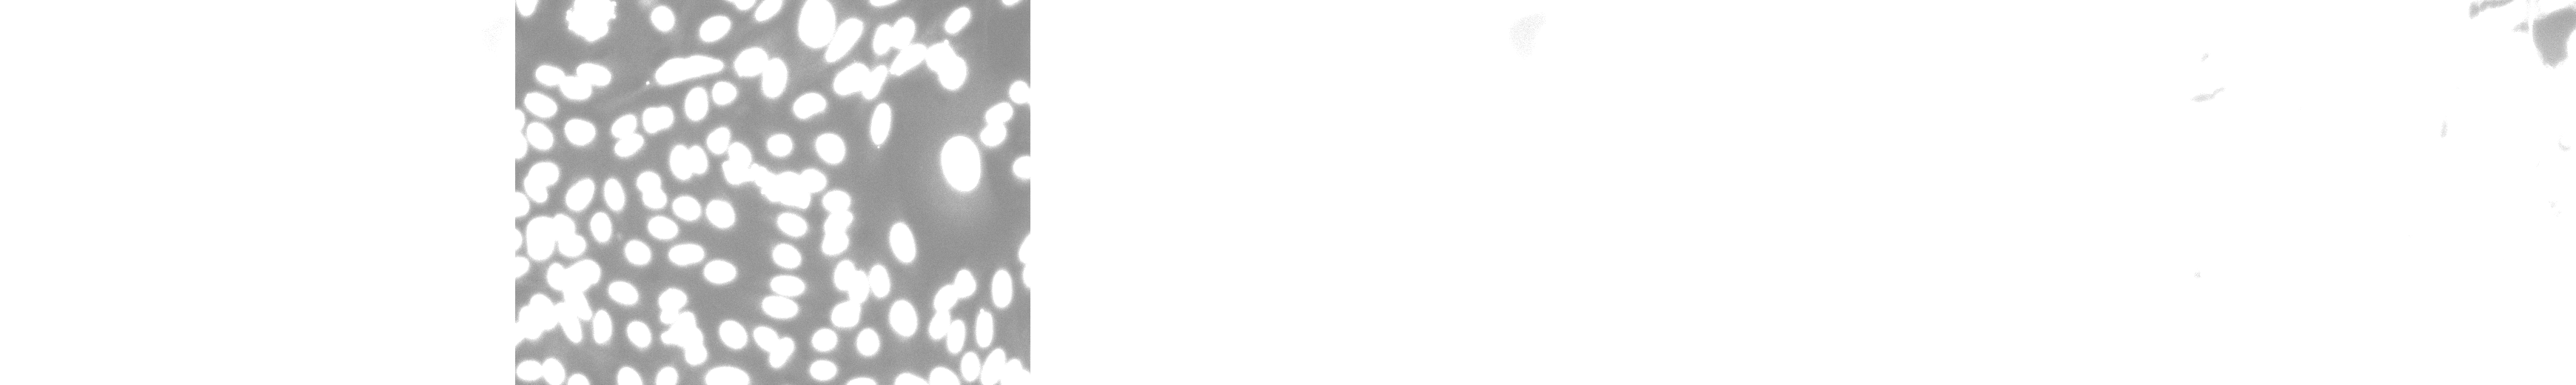

In [24]:
from PIL import Image

# Let's say you have a list of image paths for the same well/row
image_paths = [ph_golgi_path, hoechst_path, ERsyto_path, Mito_path, Nucleoli_path]

# Open all images and store them in a list
images = [Image.open(path) for path in image_paths]

# Horizontal stacking
total_width = sum(image.width for image in images)
max_height = max(image.height for image in images)
combined_image_horiz = Image.new('RGB', (total_width, max_height))
x_offset = 0
for image in images:
    combined_image_horiz.paste(image, (x_offset, 0))
    x_offset += image.width

# Vertical stacking
max_width = max(image.width for image in images)
total_height = sum(image.height for image in images)
combined_image_vert = Image.new('RGB', (max_width, total_height))
y_offset = 0
for image in images:
    combined_image_vert.paste(image, (0, y_offset))
    y_offset += image.height

# Save the combined images
combined_image_horiz
#combined_image_vert

In [ ]:

ph_golgi_path = df['Ph-golgi'][0]
hoechst_path = df['Hoechst'][0]
ERsyto_path = df['ERSyto'][0]
Mito_path = df['Mito'][0]
Nucleoli_path = df['ERSytoBleed'][0]
from PIL import Image

# Let's say you have a list of image paths for the same well/row
image_paths = [ph_golgi_path, hoechst_path, ERsyto_path, Mito_path, Nucleoli_path]

# Open all images and store them in a list
images = [Image.open(path) for path in image_paths]

In [32]:
 # Make sure you import NumPy

images_flat = {}  # Initialize an empty dictionary
for index, image in enumerate(images):
    # Convert the PIL image to a NumPy array before calling ravel()
    images_flat[f"img{index+1}_flat"] = np.array(image).ravel()

images_flat

{'img1_flat': array([740, 790, 807, ..., 708, 750, 751], dtype=uint16),
 'img2_flat': array([226, 250, 324, ..., 595, 563, 514], dtype=uint16),
 'img3_flat': array([505, 538, 600, ..., 584, 551, 560], dtype=uint16),
 'img4_flat': array([665, 643, 641, ..., 549, 589, 593], dtype=uint16),
 'img5_flat': array([468, 503, 506, ..., 832, 795, 723], dtype=uint16)}

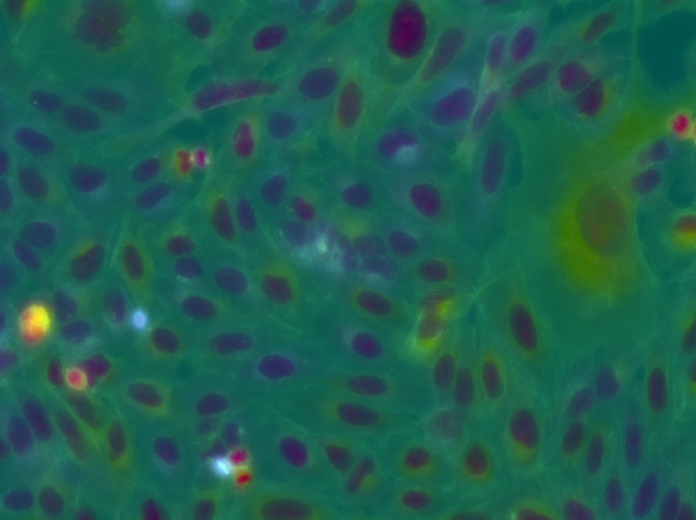

In [37]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
import numpy as np

# Let's assume you have five images as numpy arrays: img1, img2, img3, img4, img5
# For example, let's say img1 = np.array(Image.open('path_to_img1.tif').convert('L'))

# Reshape images from 2D (m x n) to 1D (m*n,)
images_flat = {}  # Initialize an empty dictionary
for index, image in enumerate(images):
    # Convert the PIL image to a NumPy array before calling ravel()
    images_flat[f"img{index+1}_flat"] = np.array(image).ravel()

images_flat

# Stack to create a (m*n) x 5 data matrix
stacked_images = np.stack([images_flat['img1_flat'], images_flat['img2_flat'], images_flat['img3_flat'], images_flat['img4_flat'], images_flat['img5_flat']], axis=1)

# Initialize PCA and reduce dimensions
pca = PCA(n_components=3)
transformed = pca.fit_transform(stacked_images)

# Reshape the transformed data back into image shape and scale to [0, 255]
transformed_images = []
for i in range(3):
    component_image = transformed[:, i].reshape(np.array(images[0]).shape)
    component_image = ((component_image - component_image.min()) / (component_image.max() - component_image.min()) * 255).astype(np.uint8)
    transformed_images.append(component_image)

# Use the transformed data to create an RGB image
rgb_image = np.stack(transformed_images, axis=-1)

# Convert to PIL Image and save or display
pil_image = Image.fromarray(rgb_image)
pil_image#ä.save('path_to_save_pca_rgb_image.png')
